# **Gerekli Kütüphanelerin Yüklenmesi**

In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input\bitcoin-historical-data\btcusd_1-min_data.csv


In [4]:
#veri setinin df adli DataFrame yuklenmesi
df = pd.read_csv('/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv') 

# ****Eksik Verileri Belirleme****

In [10]:
#veri setimizin tüm özelliklerinin veri tipi ile veri setinde kaç adet bulunduklarını kontrol etme
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4516486 entries, 0 to 4516485
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 206.7 MB


In [11]:
df.head(10) #ilk 10 satırı görme

,Timestamp,Open,High,Low,Close,Volume
0,1.726538e+09,57900.0,57942.0,57897.0,57930.0,0.571811
1,1.726538e+09,57871.0,57903.0,57871.0,57903.0,1.726522
2,1.726538e+09,57869.0,57875.0,57869.0,57873.0,1.161040
3,1.726538e+09,57867.0,57867.0,57855.0,57864.0,1.245698
4,1.726538e+09,57856.0,57872.0,57856.0,57870.0,0.208257
5,1.726538e+09,57900.0,57900.0,57847.0,57864.0,0.562259
6,1.726538e+09,57909.0,57909.0,57885.0,57901.0,0.607878
7,1.726538e+09,57888.0,57921.0,57888.0,57909.0,0.477759
8,1.726538e+09,57878.0,57899.0,57878.0,57899.0,0.269689
9,1.726538e+09,57902.0,57913.0,57896.0,57896.0,0.286779


In [12]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume
count,4.516486e+06,4.516486e+06,4.516486e+06,4.516486e+06,4.516486e+06,4.516486e+06
mean,1.591004e+09,2.064636e+04,2.065537e+04,2.063708e+04,2.064640e+04,4.468520e+00
std,7.823827e+07,1.971983e+04,1.972739e+04,1.971217e+04,1.971994e+04,1.394608e+01
min,1.455494e+09,3.869200e+02,3.877700e+02,3.820000e+02,3.840000e+02,0.000000e+00
25%,1.523249e+09,5.573985e+03,5.577780e+03,5.569278e+03,5.573845e+03,7.759044e-02
50%,1.591003e+09,1.092799e+04,1.093500e+04,1.091994e+04,1.092767e+04,6.712041e-01
75%,1.658758e+09,3.369967e+04,3.372066e+04,3.367588e+04,3.369952e+04,3.370275e+00
max,1.726538e+09,7.379300e+04,7.379400e+04,7.373900e+04,7.379400e+04,1.616060e+03


In [13]:
# isna() metodu ile eksik verileri gormek icin kullaniriz. Fakat boolean degerinde gosterir.
df.isna() 

,Timestamp,Open,High,Low,Close,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
4516481,False,False,False,False,False,False
4516482,False,False,False,False,False,False
4516483,False,False,False,False,False,False
4516484,False,False,False,False,False,False


*isna()* metodunu kullanarakda eksik değerleri görebiliriz. Fakat bu method veri setindeki eksik değerleri boolean olarak gösterecektir. Genellikle büyük veri setleriyle çalıştığımız için her bir sütun için eksik değerlerin toplam sayısını görmek daha pratik olacaktır. Bunu *isna().sum()* ile yapabiliriz.

In [14]:
df.isna().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

Pandas'da bulunan *dropna()* methodu ile eksik değer içeren satırları kaldırabiliriz. Ancak çok fazla eksik veri içeren veri setleri için tercih edilen bir yöntem değildir.

In [16]:
df['Timestamp'] = df['Timestamp'].fillna(df['Timestamp'].median())

In [17]:
# NaN değerlerini kontrol et
print("NaN değer sayısı:", df.isnull().sum().sum())


NaN değer sayısı: 0


# **Visual EDA**

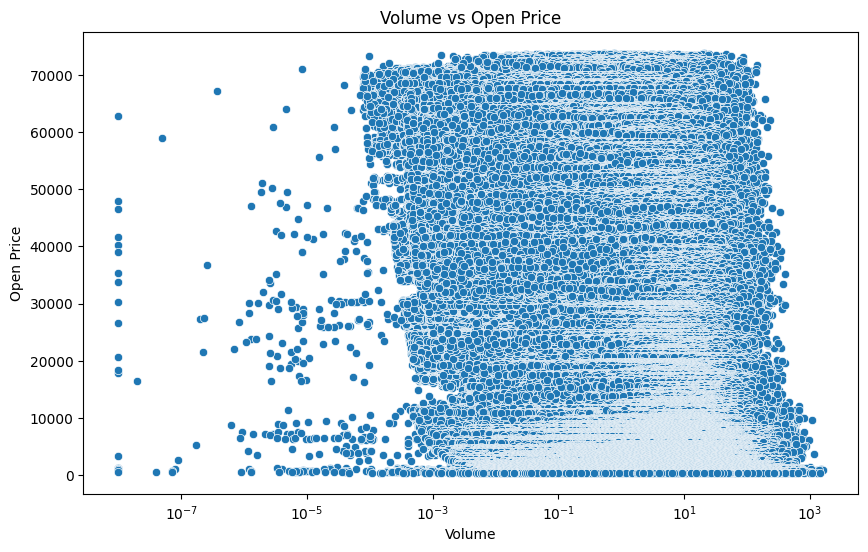

In [18]:
df = pd.read_csv('/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv')

plt.figure(figsize=(10, 6)) #grafik boyut ayari
sns.scatterplot(x=df['Volume'], y=df['Open'])
plt.title('Volume vs Open Price')
plt.xlabel('Volume')
plt.ylabel('Open Price')
plt.xscale('log')  # Hacim için logaritmik ölçek
plt.show()

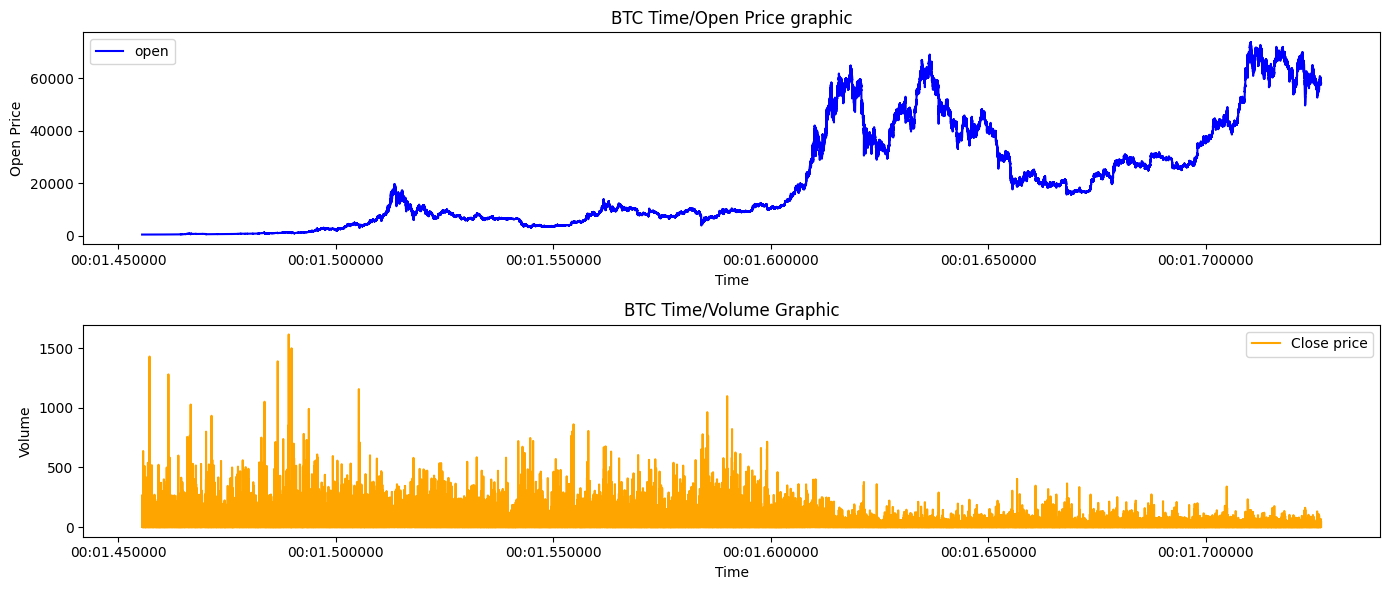

Correlation between Open Price and Closing Price: -0.12


In [19]:
df = pd.read_csv('/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace = True)

open_price = df['Open']
volume = df['Volume']


plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.plot(open_price, color='blue', label='open')
plt.title('BTC Time/Open Price graphic')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()


plt.subplot(2,1,2)
plt.plot(volume, color= 'orange', label = 'Close price')
plt.title('BTC Time/Volume Graphic')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

correlation = volume.corr(open_price)
print(f'Correlation between Open Price and Closing Price: {correlation:.2f}')


# **Veri kümesini Bağımlı ve Bağımsız Değişkenlere Bölmek**

Veri setimiz de üç adet bağımsız(Timestamp, Open, High, Low, Volume) ve bir adet bağımlı(Close) değişken mevcut. Bağımsız değişkenleri kullanarak bağımlı değişkeni tahmin edeceğiz.

Sütunları okumak için pandasda bulunan .iloc() methodunu kullanacağız. İki Sadet parametre alır; [satır , sütün]

In [56]:
df = pd.read_csv('/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv')
# Bağımlı değişkeni (Close fiyatı) seçin
y = df.iloc[:, -2].values  # Sondan ikinci sütun (bağımlı değişken)
# Bağımsız değişkenleri (sadece Close) seçin
X = df.iloc[:, -2].values.reshape(-1, 1)  # Sondan ikinci sütun (Close)

print(f'Bagimsiz Degisken{X}')
print(f'Bagimli Degisken{y}')


Bagimsiz Degisken[[57930.  ]
 [57903.  ]
 [57873.  ]
 ...
 [  399.82]
 [  399.82]
 [  399.52]]
Bagimli Degisken[57930.   57903.   57873.   ...   399.82   399.82   399.52]


# **Kategorik değişkenlerin dönüştürülmesi.**

Veri kümemizde kategorik bir değişken bulunmuyor. Fakat label encoding uygulanması için yeni bir sütun eklendi. 

In [21]:
from sklearn.preprocessing import LabelEncoder #Sklearn kutuphanesinden label encoder yukluyoruz

df = pd.read_csv('/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv')

# Bitcoin dominansı için yeni bir sütun eklendi (ornegin yes ve no)
df['Bitcoin_Dominance'] = np.where(df['Volume'] > 1 , 'yes', 'no')


df.head()

,Timestamp,Open,High,Low,Close,Volume,Bitcoin_Dominance
0,1.726538e+09,57900.0,57942.0,57897.0,57930.0,0.571811,no
1,1.726538e+09,57871.0,57903.0,57871.0,57903.0,1.726522,yes
2,1.726538e+09,57869.0,57875.0,57869.0,57873.0,1.161040,yes
3,1.726538e+09,57867.0,57867.0,57855.0,57864.0,1.245698,yes
4,1.726538e+09,57856.0,57872.0,57856.0,57870.0,0.208257,no


# **Label Encoding**

In [22]:
label_encode = LabelEncoder()

df.iloc[:,-1] = label_encode.fit_transform(df.iloc[:,-1])

df.head()

,Timestamp,Open,High,Low,Close,Volume,Bitcoin_Dominance
0,1.726538e+09,57900.0,57942.0,57897.0,57930.0,0.571811,0
1,1.726538e+09,57871.0,57903.0,57871.0,57903.0,1.726522,1
2,1.726538e+09,57869.0,57875.0,57869.0,57873.0,1.161040,1
3,1.726538e+09,57867.0,57867.0,57855.0,57864.0,1.245698,1
4,1.726538e+09,57856.0,57872.0,57856.0,57870.0,0.208257,0


**Kukla değişkenleri(dummy variables)**

Sayilsal bir degerden faydalanarak yeni bir sutun ekledigim icin gerekli suan gerekli degildir fakat,

Veri setindeki metin içeren sütunları sayıya çevirmemiz gerekir ancak sayilara ceviridigmiz 'kategorik' degerler makine tarafindan kucuktur ya da buyuktur diye algilanir. Ornegin; uc farkli ulkeden olusan bir sutunumuz olsaydi.
* Almanya
* Fransa
* ingiltere

Bu sutunlara otomatik olarak 0,1,2 gibi sayilar atayabilirdik. Fakat makine 2>1>0 gibi bir degerlendirme yapacakti.Sütundaki veriler aslında üç kategoridir ve aralarında ilişkisel bir düzen yoktur. Bunun önüne geçmek için kukla değişkenleri(dummy variables) kullanmamiz gerekirdi.

# **Veri setinin eğitim ve test setine bölünmesi.(train/test)**

Şimdi eğitim ve test setimizi oluşturmak için dört adet bölüme ayırmamız gerek. X_train(veri setinin eğitimi için), X_test (tahminde kullanılmak için), y_train(veri setinin eğitiminde kullanılan etiketli veriler), y_test(tahminde kullanmak için). İçerisine aldığı parametreler daha önce modelimizi eğitmek için ayırdığımız bağımlı(X) ve bağımsız(y) değişkenler, test_size ise veri setimizi ne kadarını eğitim ve ne kadarını test ayırıcağımızı ayarladığımız bölüm. Ayrıca random state’i de belirleyerek her seferinde aynı verilerin bölünmesini sağlıyoruz.

In [6]:
from sklearn.model_selection import train_test_split

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#  **Özellik Ölçeklendirme**
**Normalizayon**
Min-Max Normalizasyon: Verileri [0, 1] aralığına çekmek için kullanılır.

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

print(X_normalized[: 5])

[[0.78389865]
 [0.78353085]
 [0.78312219]
 [0.78299959]
 [0.78308132]]


# **Model Olusumu**

# Supervised

**Karar Ağaçları (Decision Trees)**

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
 
model = LinearRegression()

# Modeli eğitim verisiyle eğitme
model.fit(X_train, y_train)

# Test verisiyle tahmin yapma
y_pred = model.predict(X_test)

# Sonuçları değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 7.868592418175553e-20
R^2 Score: 1.0


Modelimiz %100 dogru calisiyor. Bu yüzden (overfitting) durumunu önlemek için karar ağaçları modelinde ağaç derinliğini sınırlamak ve/veya diğer hiperparametreleri ayarlamamiz gerekir.

Mean Squared Error: 21690974.018393066
R^2 Score: 0.9442286991184929


C:\Users\seyma\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


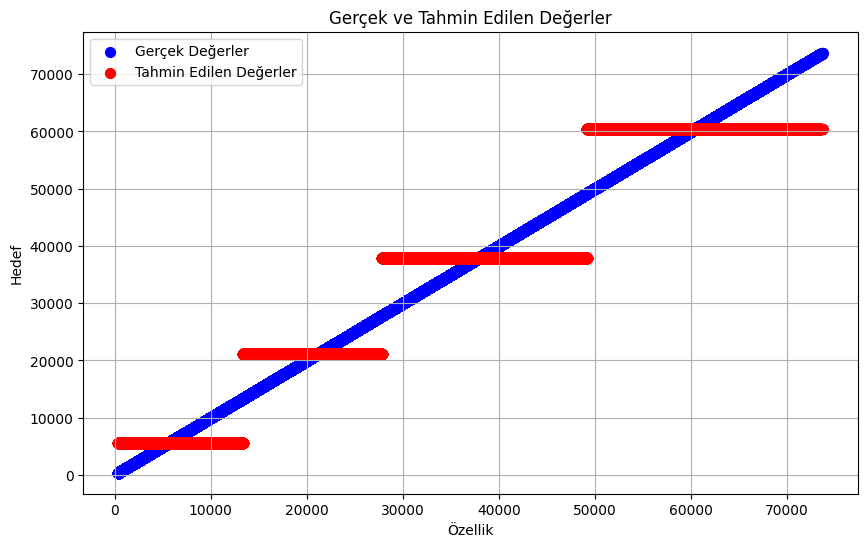

In [26]:
from sklearn.tree import DecisionTreeRegressor

# Karar Ağaçları modelini oluşturma, derinliği sınırlama
model = DecisionTreeRegressor(max_depth=2)  # Ağaç derinliğini 2 ile sınırladık

# Modeli eğitim verisiyle eğitme
model.fit(X_train, y_train)

# Test verisiyle tahmin yapma
y_pred = model.predict(X_test)

# Sonuçları değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


# Gerçek ve tahmin edilen değerleri görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Gerçek Değerler', s=50)
plt.scatter(X_test, y_pred, color='red', label='Tahmin Edilen Değerler', s=50)
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('Özellik')
plt.ylabel('Hedef')
plt.legend()
plt.grid(True)
plt.show()


# Unsupervised
**(k-Means) Kümeleme**

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df = pd.read_csv('/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv') 

# Veri boyutunu kontrol et
print("Veri seti boyutları:", X.shape)

# Veriyi ölçeklendirme
X_scaled = StandardScaler().fit_transform(X)

# PCA ile boyut azaltma
pca = PCA(n_components=1)  
X_pca = pca.fit_transform(X_scaled)

# K-Means modeli oluşturma
kmeans = KMeans(n_clusters=3)  # Küme sayısını belirleyin
kmeans.fit(X_pca)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Küme etiketlerini ve merkezlerini yazdırma
print("Küme Etiketleri:", labels)
print("Küme Merkezleri:", centers)

print(df.columns)




Veri seti boyutları: (4516486, 1)
Küme Etiketleri: [0 0 0 ... 1 1 1]
Küme Merkezleri: [[ 1.7172195 ]
 [-0.74907969]
 [ 0.34451712]]
Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


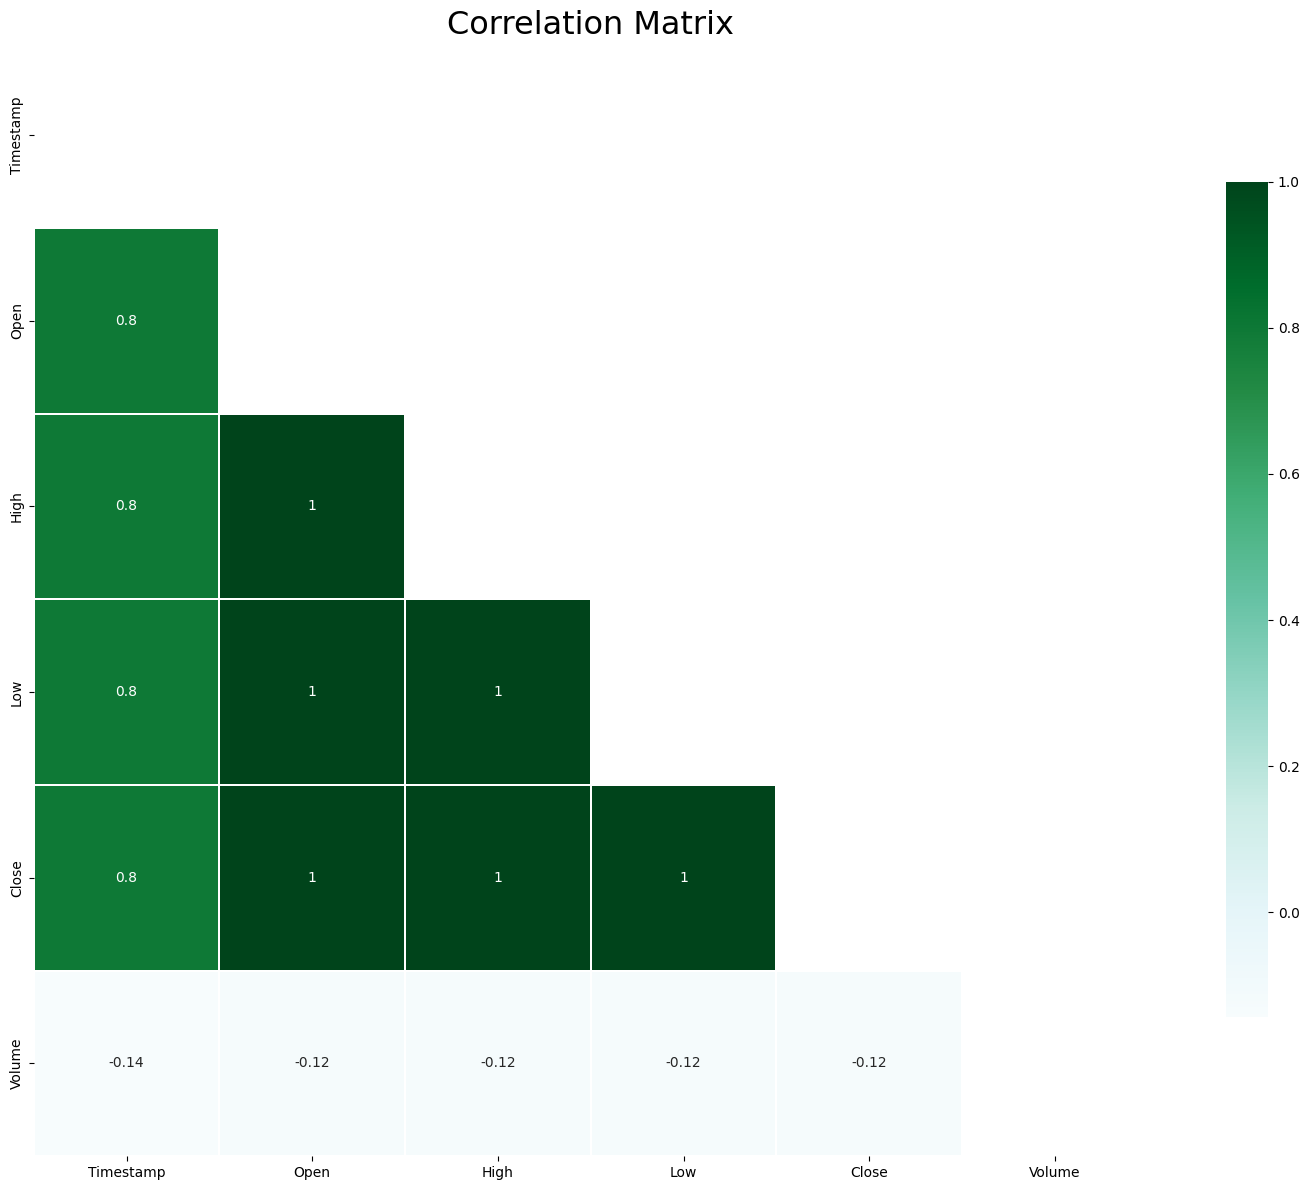

In [51]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix',fontsize=23)

sns.heatmap(df.corr(),linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": .75})
f.tight_layout()

In [65]:
from sklearn.metrics import silhouette_score

sample_size = 15000  # Örnek boyutunu ayarlayın
if len(X_pca) > sample_size:
    indices = np.random.choice(len(X_pca), size=sample_size, replace=False)
    X_sample = X_pca[indices]
    labels_sample = labels[indices]
else:
    X_sample = X_pca
    labels_sample = labels

# Silhouette skorunu hesaplama
silhouette_avg = silhouette_score(X_sample, labels_sample)
print("Silhouette Skoru:", silhouette_avg)


Silhouette Skoru: 0.6657006311976724
